# ANALYSING NEGATIVE REVIEWS ON AIRBNB LISTING USING SENTIMENT ANALYSIS

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Section I: Introduction

**Datasets**:

[Air-bnb-reviews-top 50 cities](https://drive.google.com/file/d/14-NIljR74Imltim1NRicvAG3QylzaiQa/view?usp=drivesdk)

**Description**: This dataset collects information about various reviews by different users of airbnb in the top 50 cites in the US with every detail associated with the data

[Air-bnb-users-top 50 cities](https://drive.google.com/file/d/1e5JpzUd5TkFhddqgy2IYMl0a6MkCZfkX/view?usp=drivesdk)

**Description**: This dataset collects information about users across the top 50 users of Air BnB int the US.

[Air-bnb-listings-top 50 cities](https://drive.google.com/file/d/1yN7p3TLJM4ws-xUcfh8H6F46Au9O7nfB/view?usp=drivesdk)

**Description**: This dataset collects information about various listings of Airbnb

[Data Dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing)

The Data dictionary describes all the features in the data set.

Data Wrangling and preprocessing, Sentiment Analysis and Predictive Analysis was done in this [notebook]('www.xxx.xxx') and the dataset containing just the negative reviews and users was selected for this analysis



***We will be investigating the dataset to uncover the following:***
Who are those giving negative reviews on Airbnb?
RESEARCH QUESTIONS

1. Are they newcomers or established users?

2. Are they experienced or inexperienced users?

3. Which age/gender/ethnicity?

4. What's the trend over time?

5. What is the distribution of the location? Are they the same in Western and non-Western countries (Are they the same within the USA).
**Research Areas**
1. `Target Variable(Sentiment_negative)`: studying the trends in the absent study overall proportions to help in the analysis with other variables
2. `Univariate Analysis`: Studying each variable to uncover patterns and how they relate with the target variable. How does `Age`, `Gender`, `Race` and `location` and other variables influence the reviews.
3. `Multivariate Analysis`: Studying how the variables relate with one another and how they can help in predicting the target variable. How do the variables affect each other(Correlation) and affects the target variable.

**LIMITATIONS**

1. The dataset is very large, a random sample was selected to manage computation resources.

2. The data was not totally consistent, some unusual forms of data and irregularities were found which could have affected the analysis because it was dropped.

3. Most of the columns are categorical, hence the use of Bar charts and Pie charts, Only Age was quantitative and could be visualised with appropraite means.

4. The Location Data should have included the gographical coordinates for better analysis as to how a location can affect the choice of the patient.

5. The dataset is incomplete as a machine learning model was used to predict the demography of the users


<a id='eda'></a>
## Section II: Exploratory Data Analysis

In [ ]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
# loading the data into a data frame
df = pd.read_csv('/content/sample_data/data_predicted_ml.csv')

FileNotFoundError: ignored

In [ ]:
# checking for null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6682 entries, 0 to 6681
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 6682 non-null   object 
 1   review_id                  6604 non-null   float64
 2   createdAt                  6604 non-null   object 
 3   localizedDate              6604 non-null   object 
 4   reviewee_id                6604 non-null   object 
 5   recommendedNumberOfLines   6604 non-null   object 
 6   roomTypeListingTitle       6604 non-null   object 
 7   language                   6604 non-null   object 
 8   highlightReviewMentioned   6604 non-null   object 
 9   localizedReview            6604 non-null   object 
 10  highlightedReviewSentence  6604 non-null   object 
 11  response                   6604 non-null   object 
 12  user_id                    6567 non-null   object 
 13  rating                     6567 non-null   objec

In [ ]:
# dropping null values in the data frame
df.isna().sum()
df.dropna(inplace=True)

## NEGATIVE REVIEWS BY LOCATION

In [ ]:
# sorting number of reviews by location
len(df['location'])

6508

In [ ]:
# extracting the location city, state and country from the location column
city = []
state =[]
country =[]
for i in df['location']:

  y = i.split(', ')
  if len(y) == 0 or len(y) == 1 :
   
    city.append(i)
    state.append(i)
    country.append(i)
  elif  len(y)== 2:
    city.append(y[0])
    state.append(y[0])
    country.append(y[1])
  else:
    city.append(y[0])
    state.append(y[1])
    country.append(y[2])

len(city)
len(state)
len(country)

6508

In [ ]:
# creating new column for city
df['city']= city

In [ ]:
# creating new column for state
df['state']= state 

In [ ]:
# creating new column for country
df['country']=country

In [ ]:
# mapping countries to their abbreviations into a dictionary
abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
    

In [ ]:
# creating a new column state code using the abbrev dictionary
df['state_code'] = df['state'].replace(abbrev)

In [ ]:
# creating a dictionary that maps state codes a=with the frequency at which they occur
statedict = dict(df.state_code.value_counts())
statedict.keys()
statedict.values()

dict_values([986, 673, 399, 347, 267, 229, 227, 181, 180, 154, 149, 142, 128, 126, 122, 117, 114, 112, 98, 95, 91, 82, 81, 79, 68, 63, 61, 61, 58, 53, 53, 49, 49, 45, 37, 33, 32, 31, 30, 22, 21, 21, 20, 18, 16, 14, 14, 13, 13, 13, 12, 12, 11, 10, 10, 10, 10, 9, 8, 8, 8, 8, 8, 7, 6, 6, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
#create a dictionary to map to states
state_dict ={'state':list(statedict.keys()),'count':statedict.values()}

In [ ]:
#Create a dataframe for plotting location
abbrev_to_us_state = dict(map(reversed, abbrev.items()))
map_text = pd.DataFrame(state_dict)
map_text['state_full']= map_text['state'].replace(abbrev_to_us_state)
map_text

,state,count,state_full
0,CA,986,California
1,TX,673,Texas
2,FL,399,Florida
3,NY,347,New York
4,IL,267,Illinois
...,...,...,...
258,Moscow Oblast,1,Moscow Oblast
259,Tianjin,1,Tianjin
260,Gelderland,1,Gelderland
261,Athens,1,Athens


In [ ]:
#plot the location sisctribution
fig = px.choropleth(map_text,
                    locations='state', 
                    locationmode="USA-states", hover_name ='state_full',
                    scope="usa",color='count',color_continuous_scale="Viridis_r"
                    
                    )
fig.add_scattergeo(
    locations=map_text['state'],
    locationmode='USA-states',
    text=map_text['state_full'],
    mode='text')

fig.update_layout(
    title={'text':'NEGATIVE REVIEWS BY LOCATION',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5},width =1250,height=1250)
fig.show()

In [ ]:
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode

fig = go.Figure([go.Bar(x=map_text['state_full'][0:10],
                        y=map_text['count'][0:10])])
fig.update_layout(
    title={'text':'Top 10 States with Negative Reviews',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})
 
fig.show()

Insights
1. The state with most negative reviews is California
2. Cities that are popular tend to have the most negative reviews

## NEGATIVE REVIEWS BY GENDER

In [ ]:
df['Gender'].value_counts()

Man      5074
Woman    1434
Name: Gender, dtype: int64

In [ ]:
label =['Man', 'Woman']
value = [5074,1434]
fig = go.Figure(data=[go.Pie(labels=label,
                      values=value)])
fig.update_layout(
    title={'text':' Negative Reviews By Gender',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})
 
fig.show()

Insights
1. 78% of users giving the negative reviews are men and 22% are women
2. It is highly expected as men tend to host their female partners more often

## NEGATIVE REVIEWS BY AGE

In [ ]:
fig = go.Figure(data=[go.Histogram(x=df['Age'])])
fig.update_layout(
    title={'text':' Negative Reviews By Age',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5},xaxis_title="Age", yaxis_title="Frequency")

fig.show()

In [ ]:
df['Agegroup'] = pd.cut(x=df['Age'], bins=[0, 10, 20, 30, 40, 50, 60,70, 80],
                    labels=['0 - 10 years', '11 - 20 years', '21 - 30 years',
                            '31 - 40 years', '41- 50 years','51 - 60 years','61 - 70 years','71 - 80 years'])
 

Text(0.5, 1.0, 'Negative Reviews according to Age Group')

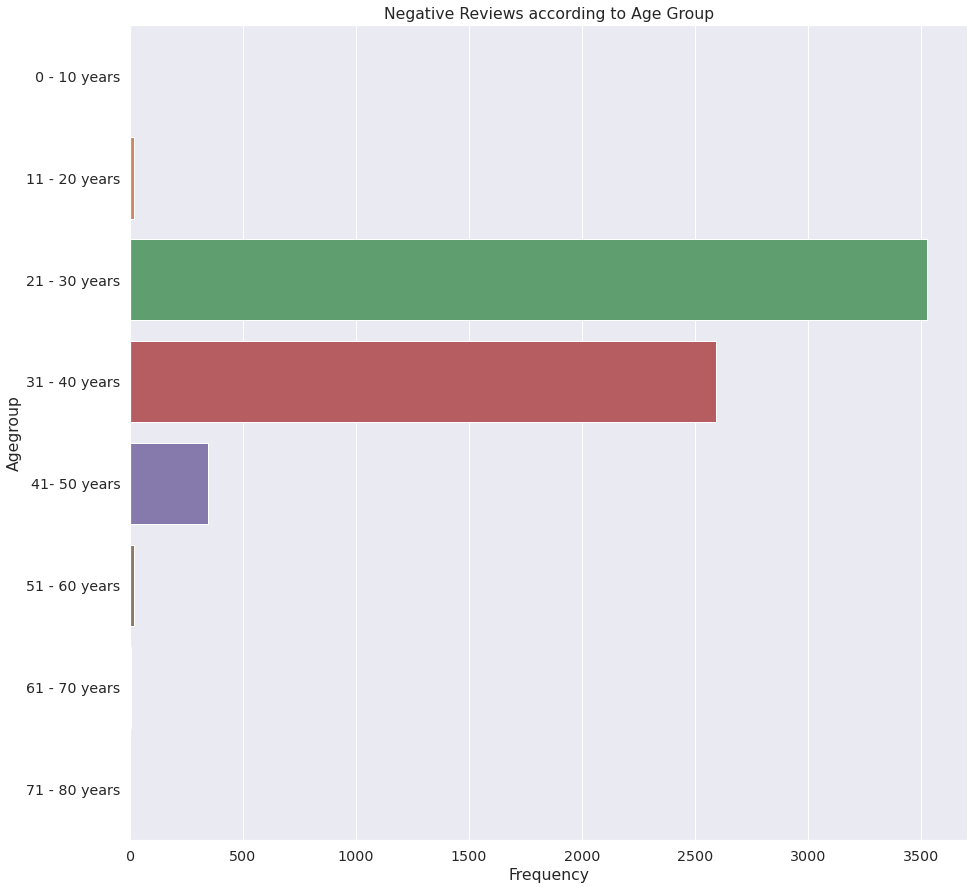

In [ ]:
plt.figure(figsize = (15,15))
sns.countplot(y='Agegroup',data=df)
sns.set(font_scale=1.3)
plt.xlabel('Frequency')
plt.title('Negative Reviews according to Age Group')

Insights
1. The distribution of age is rightly skewed  but centered around 30 years of age
2. This is highly expected as youths tend to Use Airbnb often

## NEGATIVE REVIEWS BY RACE

In [ ]:
df['Race'].value_counts()

white              3288
black              1151
asian               929
middle eastern      594
latino hispanic     455
indian               91
Name: Race, dtype: int64

In [ ]:
colours = {'white': '#0C3B5D',
          'black': '#3EC1CD',
          'asian': '#EF3A4C',
          'middle eastern ': '#FCB94D',
           'latino hispanic':'#FDB94D','indian':'#3EC1BF'}
fig = go.Figure([go.Bar(x=df['Race'],
                        y=df['Race'].value_counts())])
fig.update_layout(
    title={'text':'Negative Reviews according to Race',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})

fig.show()

Insights
1. The largest proportion of users giving negative reviews are whites
2. This is also expected as the remaining groups are minorities in the US

## ARE THE REVIEWERS NEWCOMERS OR ESTABLISHED USERS?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6508 entries, 0 to 6680
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Unnamed: 0                 6508 non-null   object  
 1   review_id                  6508 non-null   float64 
 2   createdAt                  6508 non-null   object  
 3   localizedDate              6508 non-null   object  
 4   reviewee_id                6508 non-null   object  
 5   recommendedNumberOfLines   6508 non-null   object  
 6   roomTypeListingTitle       6508 non-null   object  
 7   language                   6508 non-null   object  
 8   highlightReviewMentioned   6508 non-null   object  
 9   localizedReview            6508 non-null   object  
 10  highlightedReviewSentence  6508 non-null   object  
 11  response                   6508 non-null   object  
 12  user_id                    6508 non-null   object  
 13  rating                     6508 n

In [ ]:
df['total_listings_count'].value_counts()

0.0     6299
1.0      143
2.0       37
3.0       11
5.0        8
4.0        3
8.0        3
6.0        2
7.0        1
33.0       1
Name: total_listings_count, dtype: int64

Text(0.5, 1.0, 'Negative Reviews according to Listings')

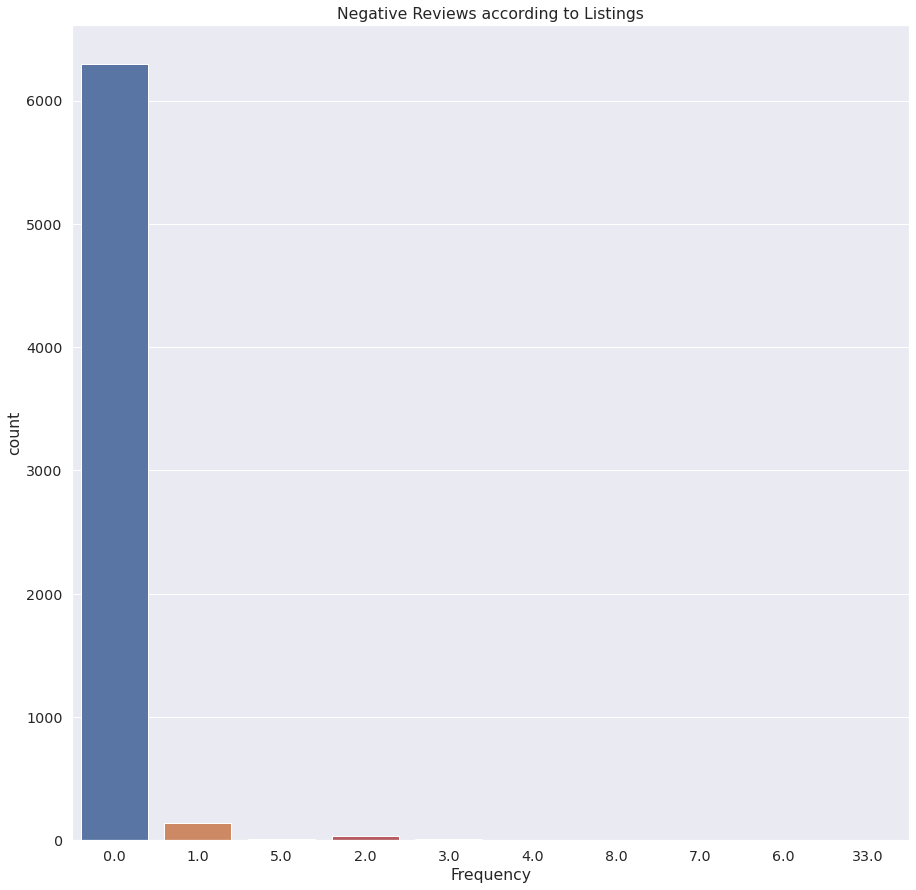

In [ ]:
plt.figure(figsize = (15,15))
sns.countplot(x='total_listings_count',data=df)
sns.set(font_scale=1.3)
plt.xlabel('Frequency')
plt.title('Negative Reviews according to Listings')

In [ ]:
label =['New Users', 'Experienced Users']
value = [6299,209]
fig = go.Figure(data=[go.Pie(labels=label,
                      values=value)])
fig.update_layout(
    title={'text':' Negative Reviews Experience',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})
 
fig.show()

Insights
1. Almost all the negative reviews came from new users.
2. The experienced users hardly give a negative review
 

## Rating VS Sentiment

In [ ]:
df['rating'].value_counts()

5    1759
1    1718
3    1295
2     884
4     845
0       7
Name: rating, dtype: int64

Text(0.5, 1.0, 'Negative Reviews according to Rating')

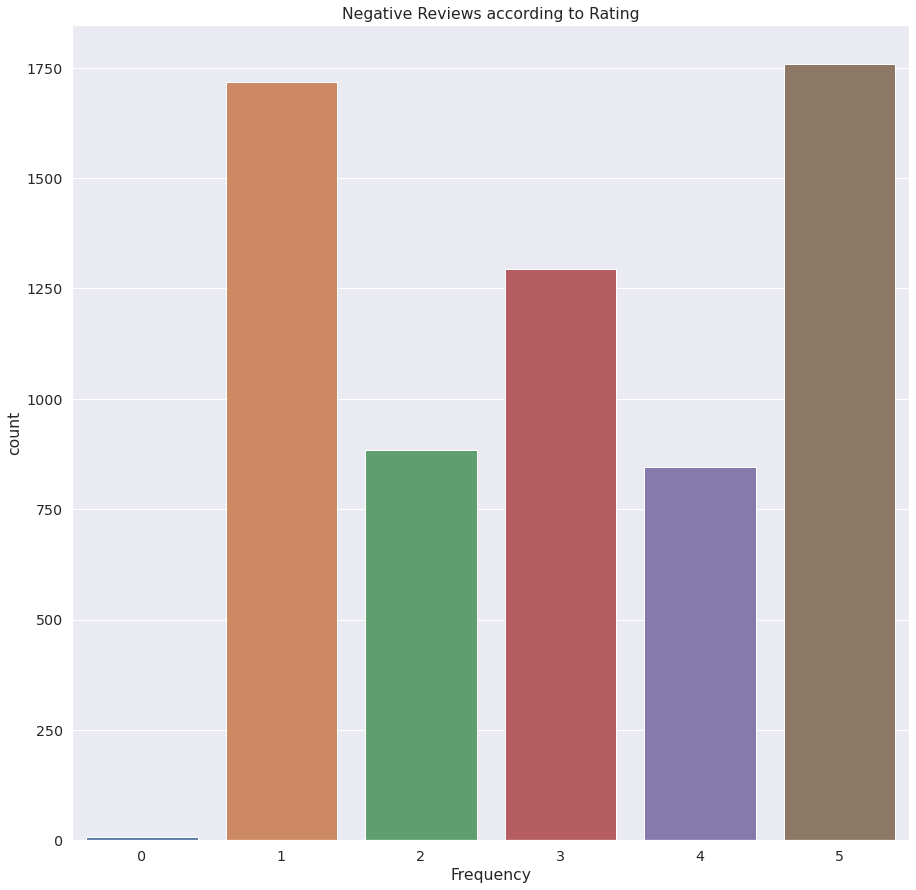

In [ ]:
plt.figure(figsize = (15,15))
sns.countplot(x='rating',data=df.sort_values(by='rating',ascending =True))
sns.set(font_scale=1.3)
plt.xlabel('Frequency')
plt.title('Negative Reviews according to Rating')

Insights
1. A huge percentage of negative reviews have positive ratings
2. The ratings cannot be trusted as means of analysing the set 

<a id='conclusions'></a>
## Section III:CONCLUSION

The following was deducted from the analysis
Location
1. The state with most negative reviews is California
2. Cities that are popular tend to have the most negative reviews

**Age**
1. The distribution of age is rightly skewed  but centered around 30 years of age
2. This is highly expected as youths tend to Use Airbnb often

**Gender**
1. 78% of users giving the negative reviews are men and 22% are women
2. It is highly expected as men tend to host their female partners more often

**Race**
1. The largest proportion of users giving negative reviews are whites
2. This is also expected as the remaining groups are minorities in the US

**First Time Users**
1. Almost all the negative reviews came from new users.
2. The experienced users hardly give a negative review

**Rating vs Sentiment**
1. A huge percentage of negative reviews have positive ratings
2. The ratings cannot be trusted as means of analysing the set  


**LIMITATIONS**

1. The dataset is very large, a random sample was selected to manage computation resources.

2. The data was not totally consistent, some unusual forms of data and irregularities were found which could have affected the analysis because it was dropped.

3. Most of the columns are categorical, hence the use of Bar charts and Pie charts, Only Age was quantitative and could be visualised with appropraite means.

4. The Location Data should have included the gographical coordinates for better analysis as to how a location can affect the choice of the patient.

5. The dataset is incomplete as a machine learning model was used to predict the demography of the users

**RECOMMENDATION**


1. A more complete dataset to include the demographic profile of the users as the Machine Learning model is 93% accurate
2. The computation required a lot of resources due to the use of Machine learning models to get features.
3. Geolocation data will make the analysis easier.

## REFERENCES

1. https://www.geeksforgeeks.org/choropleth-maps-using-plotly-in-python/
2. https://medium.com/geekculture/create-a-choropleth-map-of-state-unemployment-rates-with-plotly-1354050e0cfd
3. https://www.codegrepper.com/code-examples/python/plotly+choropleth+map+us+states
4. https://plotly.github.io/plotly.py-docs/generated/plotly.express.choropleth.html
5. https://plotly.com/python/scatter-plots-on-maps/